<a href="https://colab.research.google.com/github/ShilpaVasista/Exploratory-Data-Analytics/blob/main/EDA_Lab_7_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Exercise 7

Explore the structure of a time series dataset (e.g., stock prices).
- Import pandas and load the stock price data (date, open, high, low, close, volume)
into a DataFrame.
- Clean the data and visualize trends using line charts.
- Calculate basic time series statistics.

Dataset: Stock price data (e.g., daily stock prices for a particular company) containing columns like Date, Open, High, Low, Close, and Volume.

1. Import pandas and load the stock price data (date, open, high, low, close, volume) into a DataFrame.



Data Cleaning:

- The Date column is converted into a pandas datetime object to enable time-based indexing and operations.
- Missing values are filled using forward filling (ffill), which takes the previous valid observation and propagates it forward to fill missing entries.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace with your own path to the CSV file)
df = pd.read_csv('ADANIPORTS.csv')  # Replace with the path to your dataset

# Inspect the first few rows of the dataset
print(df.head())

# 1. Data Cleaning:
# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Handle missing values (e.g., filling missing stock prices with the previous available data)
# Forward fill missing values in the dataset for available columns
df.ffill(inplace=True)

         Date      Symbol Series  Prev Close    Open     High    Low   Last  \
0  2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0  959.0   
1  2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0  885.0   
2  2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0  887.0   
3  2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0  929.0   
4  2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0  980.0   

    Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  962.90  984.72  27294366  2.687719e+15     NaN             9859619   
1  893.90  941.38   4581338  4.312765e+14     NaN             1453278   
2  884.20  888.09   5124121  4.550658e+14     NaN             1069678   
3  921.55  929.17   4609762  4.283257e+14     NaN             1260913   
4  969.30  965.65   2977470  2.875200e+14     NaN              816123   

   %Deliverble  
0       0.3612  
1       0.3172  
2       0.2088  
3       0.2735  
4

2. Visualize the stock’s closing price trend using a line chart to understand price movements over time.

- A line chart is used to visualize the trend of the stock’s closing price over time. This helps in identifying upward or downward movements and other trends in the data.
- A line chart of daily price changes is plotted using the diff() method, showing how much the price changed from one day to the next.
- A scatter plot is used to explore the relationship between the trading volume and the stock’s closing price.

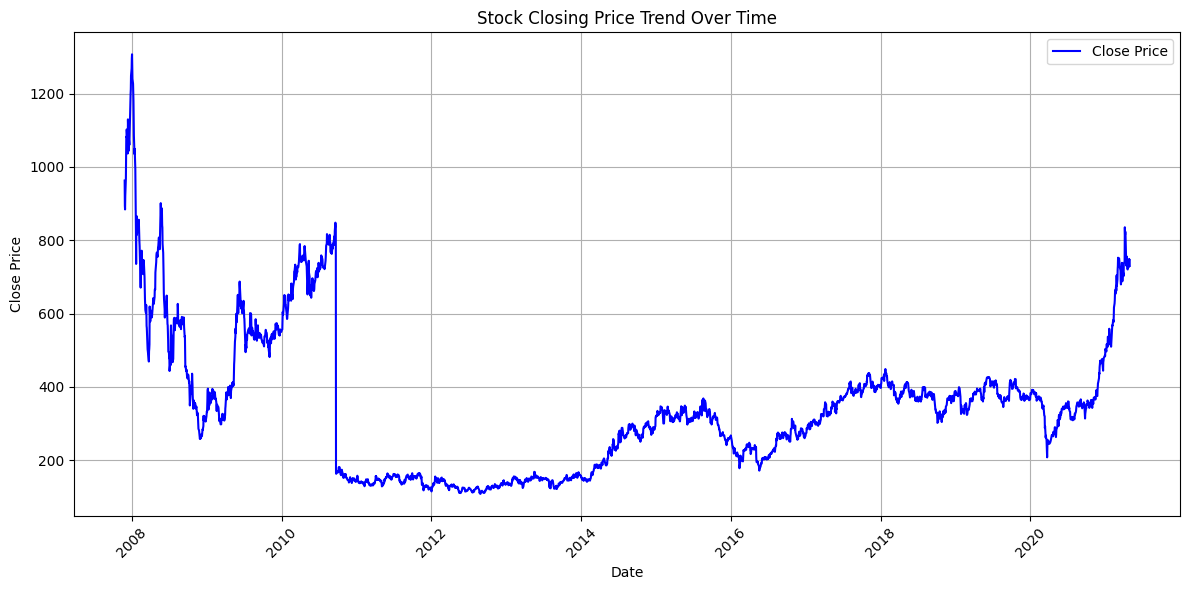

In [ ]:
# Visualize the Closing Price Trend
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], color='b', label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Closing Price Trend Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

3. Calculate and visualize basic statistics (mean, median, standard deviation) for the stock prices.
- Basic statistics (mean, median, standard deviation) of the closing price are calculated to understand the distribution and variability of the stock prices.
- The daily price change is calculated using the diff() method on the 'Close' column, which represents the difference between consecutive days' closing prices.

In [ ]:
# Calculate Basic Time Series Statistics
# Calculate mean, median, and standard deviation for Close Price
mean_price = df['Close'].mean()
median_price = df['Close'].median()
std_dev_price = df['Close'].std()

# Print out the basic statistics
print(f"Mean Closing Price: {mean_price}")
print(f"Median Closing Price: {median_price}")
print(f"Standard Deviation of Closing Price: {std_dev_price}")

Mean Closing Price: 344.2016255267911
Median Closing Price: 324.70000000000005
Standard Deviation of Closing Price: 193.04588649138373


4. Calculate the daily price change (using the "Close" price) and visualize it.
- The daily price change is calculated using the diff() method on the 'Close' column, which represents the difference between consecutive days' closing prices.

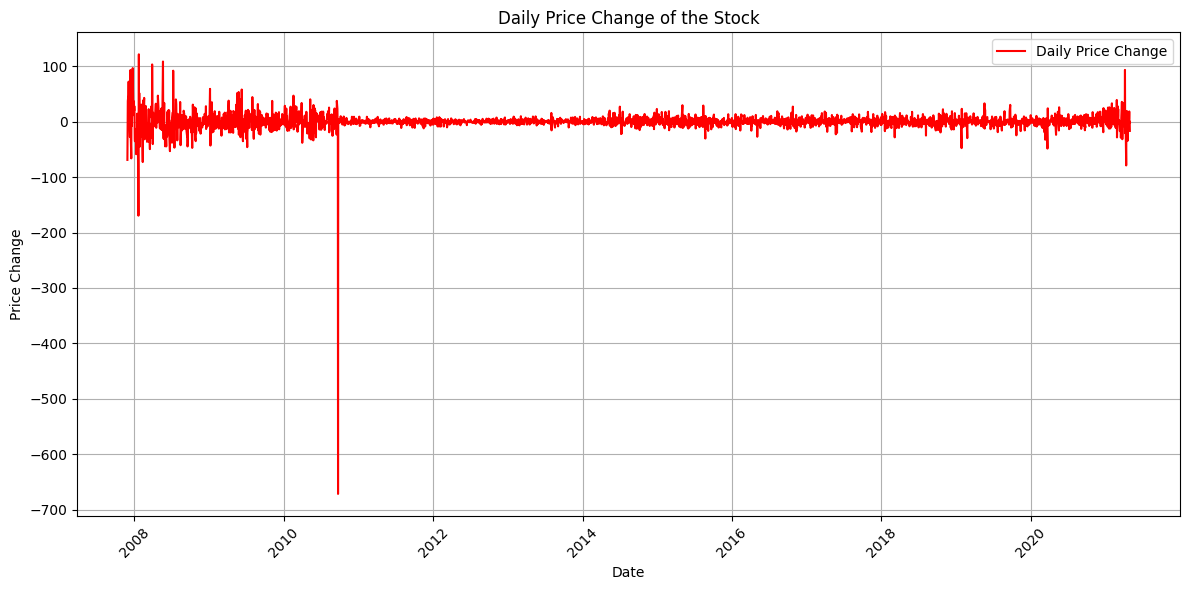

In [ ]:
# Calculate Daily Price Change (using 'Close' price)
df['PriceChange'] = df['Close'].diff()

# Visualize the daily price change
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['PriceChange'], color='r', label='Daily Price Change')
plt.xlabel('Date')
plt.ylabel('Price Change')
plt.title('Daily Price Change of the Stock')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

5. Explore the correlation between the stock's volume and closing price.

Correlation Analysis:

  - A scatter plot is used to explore the correlation between Volume and Close. This helps determine whether there’s a relationship between the trading volume and the stock price.


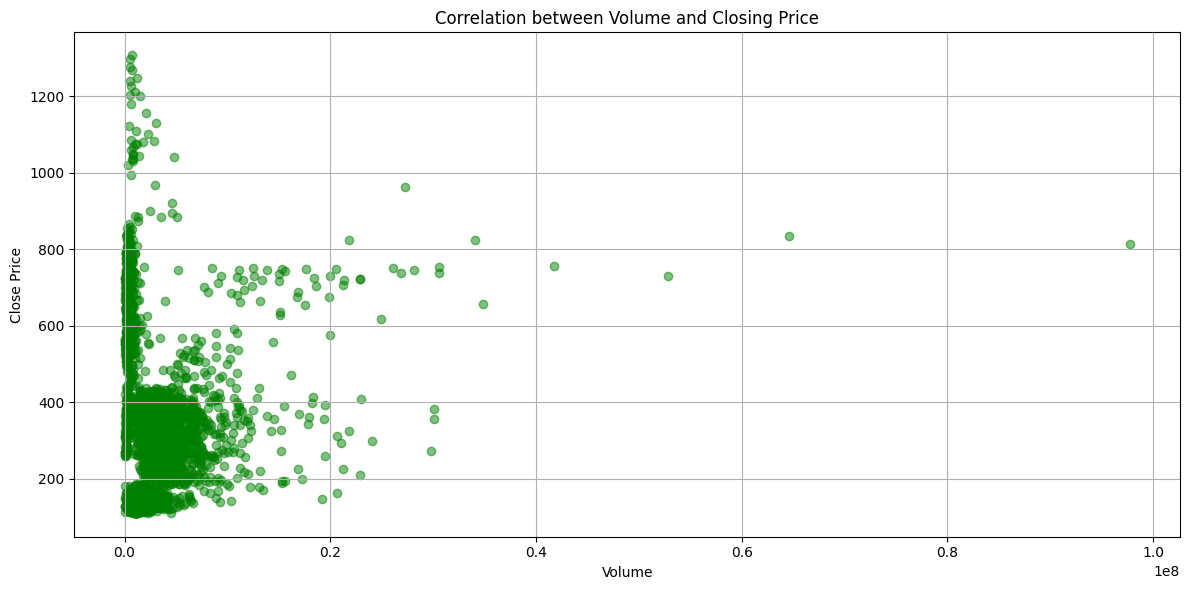

             Close        Volume
count  3322.000000  3.322000e+03
mean    344.201626  2.954564e+06
std     193.045886  4.104227e+06
min     108.000000  1.236600e+04
25%     164.312500  7.493682e+05
50%     324.700000  2.007292e+06
75%     400.912500  3.636883e+06
max    1307.450000  9.771788e+07


In [ ]:
# Explore Correlation between Volume and Closing Price
plt.figure(figsize=(12, 6))
plt.scatter(df['Volume'], df['Close'], alpha=0.5, color='g')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.title('Correlation between Volume and Closing Price')
plt.grid(True)
plt.tight_layout()
plt.show()

# Additional: Descriptive statistics for the 'Close' and 'Volume' columns
print(df[['Close', 'Volume']].describe())